In [35]:
# design model (input size, output size, forward pass)
# construct loss and optimizer
# training loop
#    - forward pass: compute prediction andloss
#    - backward pass: gradients
#    - update weights

In [36]:
import torch
import torch.nn as nn

In [37]:
import numpy as np
from tqdm import trange

In [38]:
from sklearn import datasets

In [39]:
import matplotlib.pyplot as plt

In [40]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

print(X.shape)
print(y.shape)
y = y.view(y.shape[0], 1)
print(y.shape)
print(X[:5])
print(y[:5])

n_samples, n_features = X.shape

torch.Size([100, 1])
torch.Size([100])
torch.Size([100, 1])
tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198]])
tensor([[-55.5386],
        [-10.6620],
        [ 22.7574],
        [101.0961],
        [144.3376]])


In [41]:
# design model (input size, output size, forward pass)
input_size = n_features
output_size = 1
print(n_features)

model = nn.Linear(input_size, output_size)

1


In [42]:
# construct loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
# training loop
n_epochs = 1000
for epoch in (t := trange(n_epochs)):
    # forward pass
    y_predicted = model(X)
    #print(y_predicted.shape)
    #print("--",y.shape)
 

    # loss
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss = loss.mean()
    loss.backward()
    
    # update weights
    optimizer.step()
    
    optimizer.zero_grad()
    
    t.set_description("loss: %.5f" % (loss.item()))

loss: 332.56757: 100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1215.52it/s]


In [ ]:
print)

[[ -46.40622  ]
 [ -16.515078 ]
 [  44.349113 ]
 [  66.90798  ]
 [ 129.41502  ]
 [  35.197124 ]
 [  46.36269  ]
 [ -51.313187 ]
 [-111.13491  ]
 [  30.088968 ]
 [ -48.488064 ]
 [ -28.671867 ]
 [ -86.729706 ]
 [  78.36049  ]
 [ -86.66967  ]
 [  72.34893  ]
 [  -2.1794224]
 [ -25.001015 ]
 [ -51.26503  ]
 [ -84.44897  ]
 [ -21.202957 ]
 [ 184.32964  ]
 [  75.43656  ]
 [  20.41066  ]
 [ -27.624386 ]
 [ -52.34273  ]
 [   8.244895 ]
 [  52.127136 ]
 [ 107.39596  ]
 [ -58.1719   ]
 [ -24.761223 ]
 [ -69.16136  ]
 [  19.442432 ]
 [  76.324196 ]
 [  73.25698  ]
 [ -37.556442 ]
 [ -24.308462 ]
 [ 143.65492  ]
 [-185.78665  ]
 [  80.85532  ]
 [ 177.29207  ]
 [ 124.654945 ]
 [ -65.66211  ]
 [ -68.355446 ]
 [ -22.54029  ]
 [  77.06427  ]
 [  17.254595 ]
 [  97.39567  ]
 [ -26.901047 ]
 [  45.501926 ]
 [ -13.176432 ]
 [  13.965277 ]
 [  52.441235 ]
 [  30.369759 ]
 [ -52.997074 ]
 [  61.63071  ]
 [ 102.94591  ]
 [ -12.505327 ]
 [  47.800034 ]
 [  65.26102  ]
 [  37.87686  ]
 [  13.870396 ]
 [ -58.7

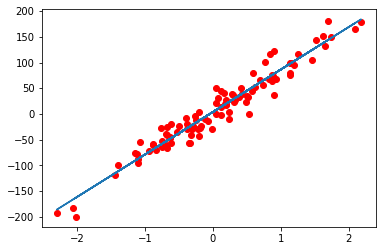

In [45]:
predicted = model(X).detach().numpy()
print(predicted)

plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted)